In [36]:
#importing libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [75]:
class NaiveBayesClassifier():
    
    #Bayes Theorem form P(y|X) = P(X|y) * P(y) / P(X)
    
    def calc_prior(self, features, target):
        
        #prior probability P(y)
        #calculate prior probabilities
        
        self.prior = (features.groupby(target).apply(lambda x: len(x)) / self.rows).to_numpy()

        return self.prior
    
    def calc_statistics(self, features, target):
        
        #calculate mean, variance for each column and convert to numpy array
        
        self.mean = features.groupby(target).apply(np.mean).to_numpy()
        self.var = features.groupby(target).apply(np.var).to_numpy()
              
        return self.mean, self.var
    
    def gaussian_density(self, class_idx, x):     
        
        #calculate probability from gaussian density function (normally distributed)
       # we will assume that probability of specific target value given specific class is normally distributed 
        
 # probability density function
# (1/√2pi*σ) * exp((-1/2)*((x-μ)^2)/(2*σ²)), where μ is mean, σ² is variance, σ is quare root of variance (standard deviation)
        
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        prob = numerator / denominator
        return prob
    
    def calc_posterior(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for i in range(self.count):
            prior = np.log(self.prior[i]) ## use the log to make it more numerically stable
            conditional = np.sum(np.log(self.gaussian_density(i, x))) # use the log to make it more numerically stable
            posterior = prior + conditional
            posteriors.append(posterior)
        # return class with highest posterior probability
        return self.classes[np.argmax(posteriors)]
    
    def fit(self, features, target):
        self.classes = np.unique(target)
        self.count = len(self.classes)
        self.feature_nums = features.shape[1]
        self.rows = features.shape[0]
        
        self.calc_statistics(features, target)
        self.calc_prior(features, target)
        
    def predict(self, features):
        preds = [self.calc_posterior(f) for f in features.to_numpy()]
        return preds

    def accuracy(self, y_test, y_pred):
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        return accuracy

    def visualize(self, y_true, y_pred, target):
        
        tr = pd.DataFrame(data=y_true, columns=[target])
        pr = pd.DataFrame(data=y_pred, columns=[target])
        
        
        fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,6))
        
        sns.countplot(x=target, data=tr, ax=ax[0], palette='viridis', alpha=0.7, hue=target, dodge=False)
        sns.countplot(x=target, data=pr, ax=ax[1], palette='viridis', alpha=0.7, hue=target, dodge=False)
        

        fig.suptitle('True vs Predicted Comparison', fontsize=20)

        ax[0].tick_params(labelsize=12)
        ax[1].tick_params(labelsize=12)
        ax[0].set_title("True values", fontsize=18)
        ax[1].set_title("Predicted values", fontsize=18)
        plt.show()

In [76]:
# pre-process dataset for training 

# upload dataset
df = pd.read_csv(r"E:\Mtech\Sem 1\21DS602-ML\Assignments\Presentation 2\Data_Naive_Bayes_1.csv")
# shuffle dataset with sample
df = df.sample(frac=1, random_state=1).reset_index(drop=True)
# df shape
print(df.shape)
# set features and target
X, y = df.iloc[:, :-1], df.iloc[:, -1]


# # split on train and test 0.7/0.3
X_train, X_test, y_train, y_test = X[:100], X[100:], y[:100], y[100:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
df

(159, 7)
(100, 6) (100,)
(59, 6) (59,)


,Weight\t,Length1,Length2,Length3,Height,Width,Species
0,1000.0,33.5,37.0,42.6,18.9570,6.6030,Bream
1,120.0,19.4,21.0,23.7,6.1146,3.2943,Roach
2,600.0,29.4,32.0,37.2,14.9544,5.1708,Bream
3,130.0,20.5,22.5,24.0,5.8560,3.6240,Perch
4,85.0,18.2,20.0,21.0,5.0820,2.7720,Perch
...,...,...,...,...,...,...,...
154,345.0,36.0,38.5,41.0,6.3960,3.9770,Pike
155,500.0,42.0,45.0,48.0,6.9600,4.8960,Pike
156,5.9,7.5,8.4,8.8,2.1120,1.4080,Perch
157,950.0,48.3,51.7,55.1,8.9262,6.1712,Pike


In [77]:
X_train.shape

(100, 6)

In [90]:
x.classes, x.feature_nums, x.rows, x.count

(array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
       dtype=object),
 6,
 100,
 7)

In [91]:
x.calc_prior(X_train, y_train)

array([0.23, 0.05, 0.39, 0.07, 0.14, 0.08, 0.04])

In [92]:
x.prior

array([0.23, 0.05, 0.39, 0.07, 0.14, 0.08, 0.04])

In [81]:
x.calc_statistics(X_train, y_train)

(array([[634.17391304,  30.47391304,  33.2826087 ,  38.5173913 ,
          15.23676087,   5.47100435],
        [144.        ,  18.38      ,  19.98      ,  22.4       ,
           8.74988   ,   3.19508   ],
        [372.93589744,  25.77948718,  27.96666667,  29.65641026,
           7.82210513,   4.72035641],
        [697.14285714,  41.58571429,  44.54285714,  47.72857143,
           7.77315714,   5.09974286],
        [146.57142857,  20.55714286,  22.21428571,  24.83571429,
           6.65422857,   3.63195   ],
        [ 11.6       ,  11.325     ,  12.025     ,  13.1375    ,
           2.2191125 ,   1.391025  ],
        [470.        ,  27.475     ,  29.975     ,  32.9       ,
           9.75775   ,   5.407925  ]]),
 array([[4.79477958e+04, 1.45167108e+01, 1.70649149e+01, 1.89683932e+01,
         4.22917705e+00, 5.59598612e-01],
        [2.18400000e+03, 5.07360000e+00, 6.04560000e+00, 7.56800000e+00,
         1.55009180e+00, 2.12247386e-01],
        [1.14565105e+05, 6.66334254e+01, 7.4337

In [82]:
x.mean

array([[634.17391304,  30.47391304,  33.2826087 ,  38.5173913 ,
         15.23676087,   5.47100435],
       [144.        ,  18.38      ,  19.98      ,  22.4       ,
          8.74988   ,   3.19508   ],
       [372.93589744,  25.77948718,  27.96666667,  29.65641026,
          7.82210513,   4.72035641],
       [697.14285714,  41.58571429,  44.54285714,  47.72857143,
          7.77315714,   5.09974286],
       [146.57142857,  20.55714286,  22.21428571,  24.83571429,
          6.65422857,   3.63195   ],
       [ 11.6       ,  11.325     ,  12.025     ,  13.1375    ,
          2.2191125 ,   1.391025  ],
       [470.        ,  27.475     ,  29.975     ,  32.9       ,
          9.75775   ,   5.407925  ]])

In [83]:
x.var

array([[4.79477958e+04, 1.45167108e+01, 1.70649149e+01, 1.89683932e+01,
        4.22917705e+00, 5.59598612e-01],
       [2.18400000e+03, 5.07360000e+00, 6.04560000e+00, 7.56800000e+00,
        1.55009180e+00, 2.12247386e-01],
       [1.14565105e+05, 6.66334254e+01, 7.43370940e+01, 8.31968179e+01,
        7.60046861e+00, 2.82559096e+00],
       [2.11363265e+05, 6.89983673e+01, 8.04395918e+01, 8.73706122e+01,
        2.64779206e+00, 1.00107262e+00],
       [8.63110204e+03, 1.42710204e+01, 1.58840816e+01, 1.90394388e+01,
        1.61234406e+00, 5.33976317e-01],
       [2.53300000e+01, 2.12937500e+00, 2.92687500e+00, 2.98734375e+00,
        1.85646889e-01, 1.24509794e-01],
       [4.84500000e+04, 1.65518750e+01, 1.75518750e+01, 1.91750000e+01,
        2.37081663e+00, 1.34532694e+00]])

In [84]:
X_train

,Weight\t,Length1,Length2,Length3,Height,Width
0,1000.0,33.5,37.0,42.6,18.9570,6.6030
1,120.0,19.4,21.0,23.7,6.1146,3.2943
2,600.0,29.4,32.0,37.2,14.9544,5.1708
3,130.0,20.5,22.5,24.0,5.8560,3.6240
4,85.0,18.2,20.0,21.0,5.0820,2.7720
...,...,...,...,...,...,...
95,680.0,31.8,35.0,40.6,15.4686,6.1306
96,170.0,19.0,20.7,23.2,9.3960,3.4104
97,500.0,28.5,30.7,36.2,14.2266,4.9594
98,510.0,40.0,42.5,45.5,6.8250,4.4590


In [85]:
# train the model
x = NaiveBayesClassifier()


x.fit(X_train, y_train)

In [86]:
predictions = x.predict(X_test)

<ipython-input-75-d4bb2036393a>:44: RuntimeWarning: divide by zero encountered in log
  conditional = np.sum(np.log(self.gaussian_density(i, x))) # use the log to make it more numerically stable


In [87]:
x.accuracy(y_test, predictions)

0.5254237288135594

In [88]:
y_test.value_counts(normalize=True)

Perch        0.288136
Bream        0.203390
Pike         0.169492
Roach        0.101695
Smelt        0.101695
Parkki       0.101695
Whitefish    0.033898
Name: Species, dtype: float64

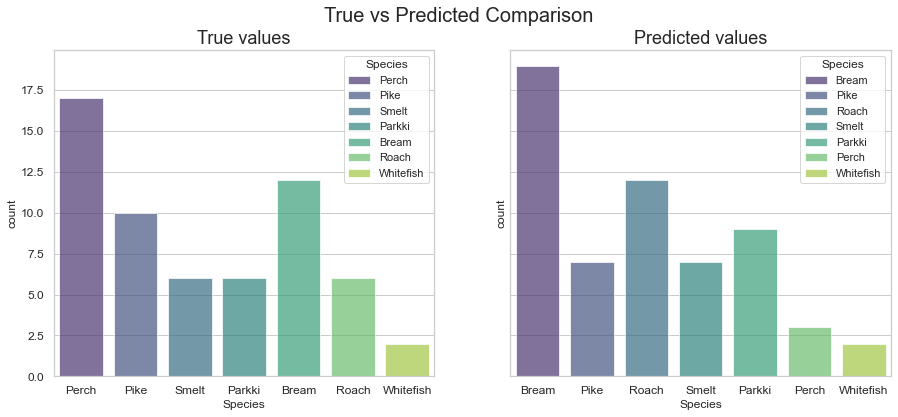

In [89]:
x.visualize(y_test, predictions, 'Species')